In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder ,StandardScaler

from sklearn.model_selection import train_test_split ,GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression ,Lasso ,Ridge ,ElasticNet

from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,AdaBoostRegressor

from xgboost import XGBRegressor

**printing out a list of all the files**

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [3]:
train_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample_submission_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
all_data = pd.concat((train_df,test_df),axis = 0)


In [4]:
train_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**describe numerical variable**

In [6]:
all_num_col = train_df.describe().T.index #all numerical variable
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


**describe categorical variable**

In [7]:
all_cat_col = train_df.describe(include=['O']).T.index #all categorical variable
train_df.describe(include=['O'])

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


**find out how many the numerical and the categorical variable**

In [8]:
print(f'there are {all_num_col.shape[0]} numerical variable & {all_cat_col.shape[0]} categorical variable')

there are 38 numerical variable & 43 categorical variable


**The correlations between numerical variables**

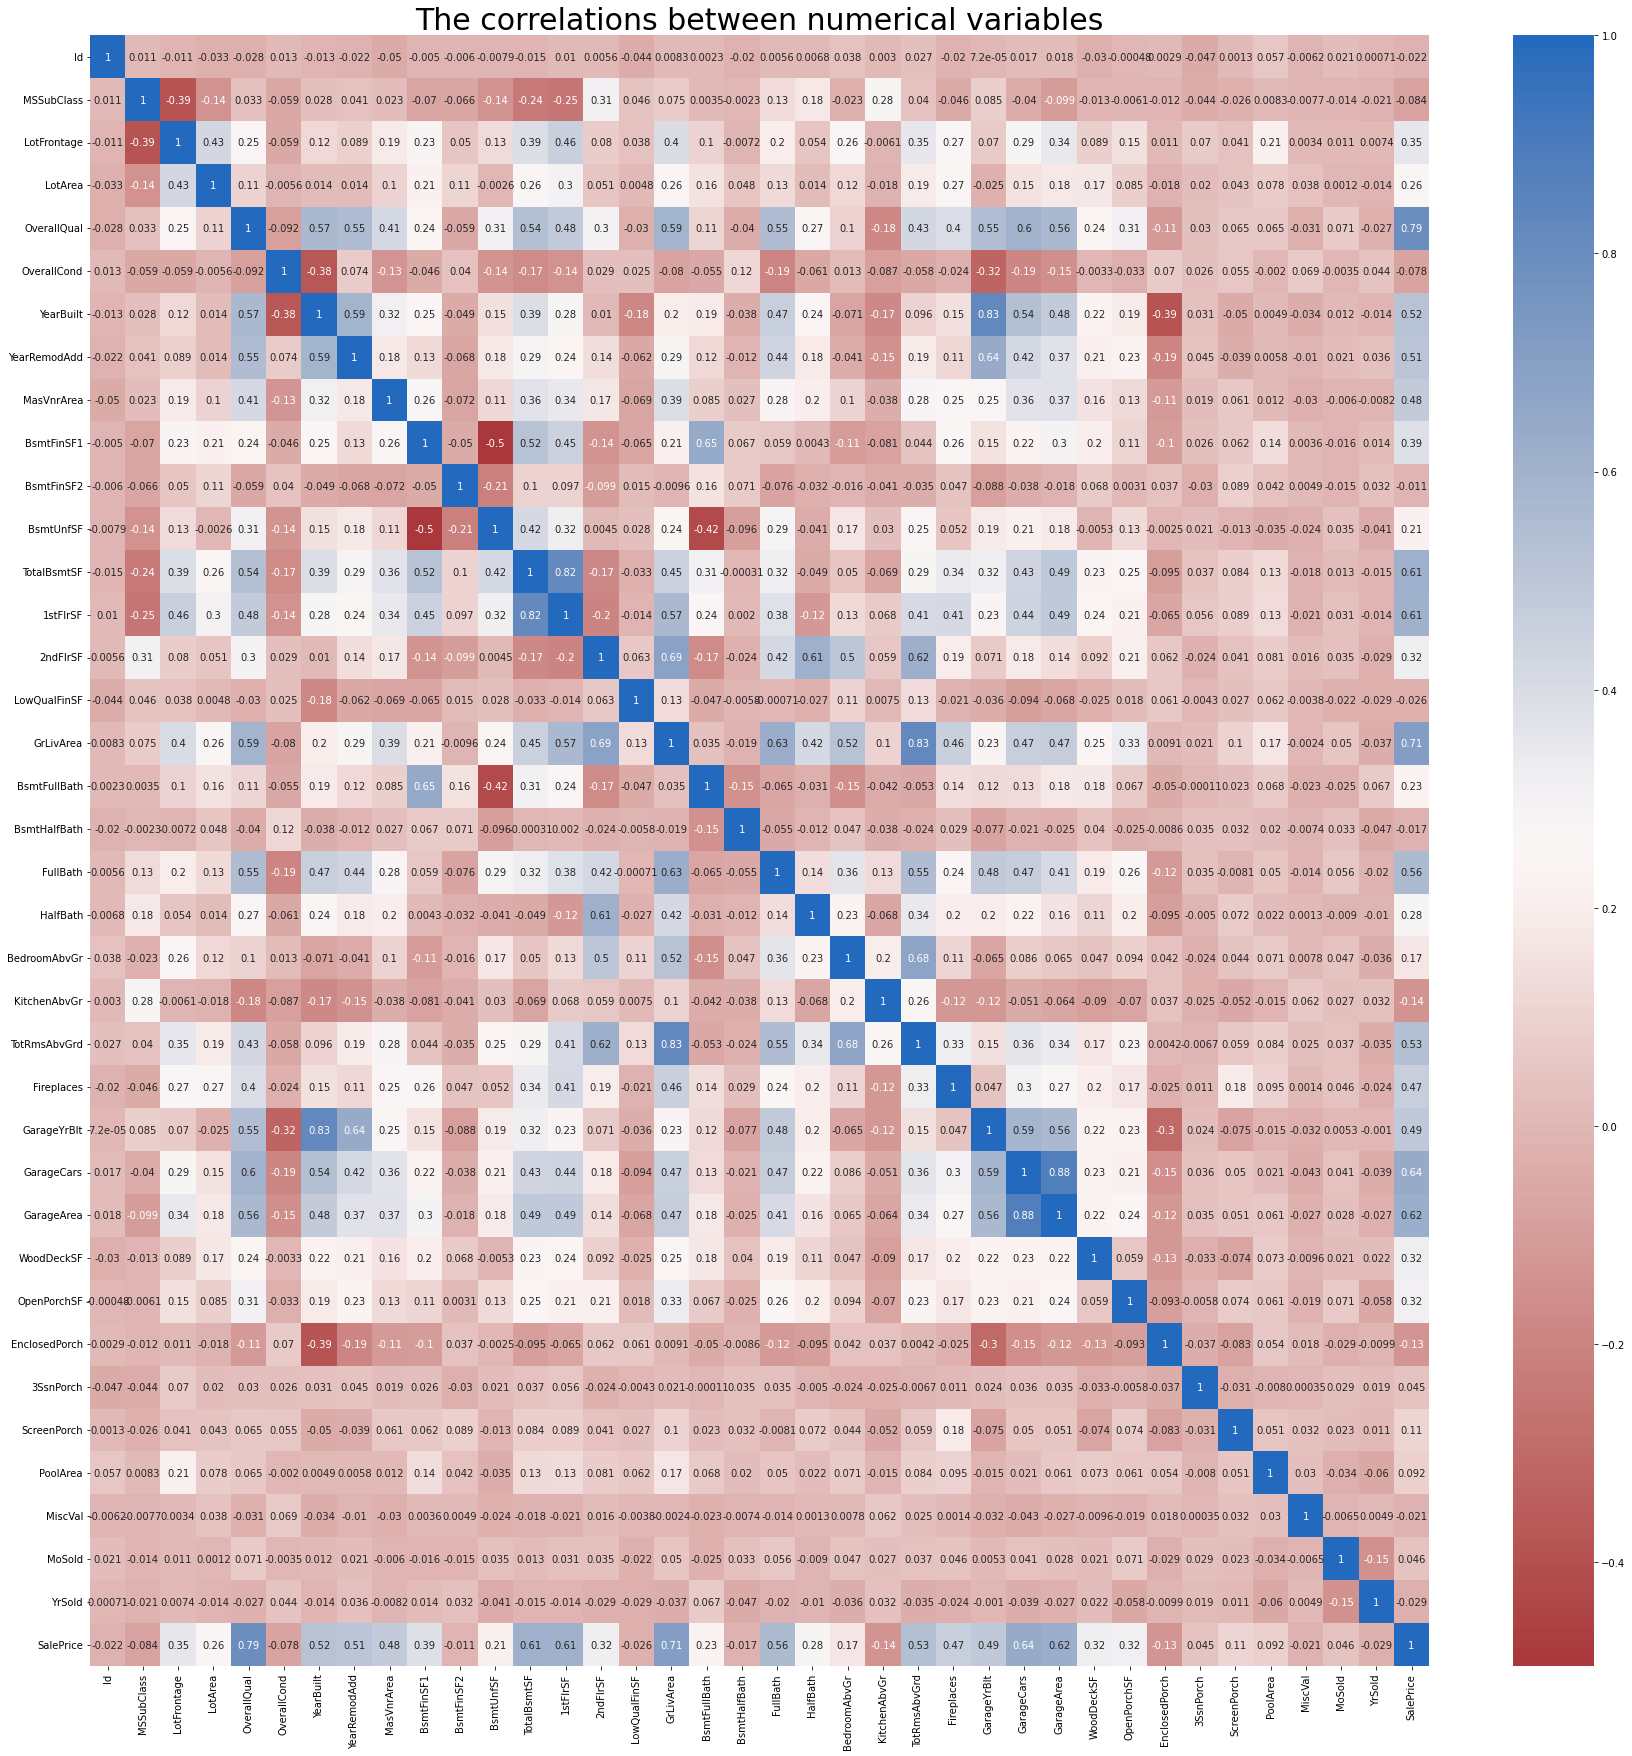

In [9]:
plt.figure(figsize=[30,30])
sns.heatmap(train_df.corr() , cmap='vlag_r' ,annot=True )
plt.title('The correlations between numerical variables',size=30);

**view the numerical columns that have greater than 50% correlation between sales price**

In [10]:
selceted_num_col = train_df.corr()[train_df.corr()['SalePrice'] > 0.5]['SalePrice'].index 
selceted_num_df = train_df[selceted_num_col]
train_df.corr()[train_df.corr()['SalePrice'] > 0.5]['SalePrice'].sort_values(ascending = False)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [11]:
selceted_num_df

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


**visualize the selected numerical Vs SalePrice**

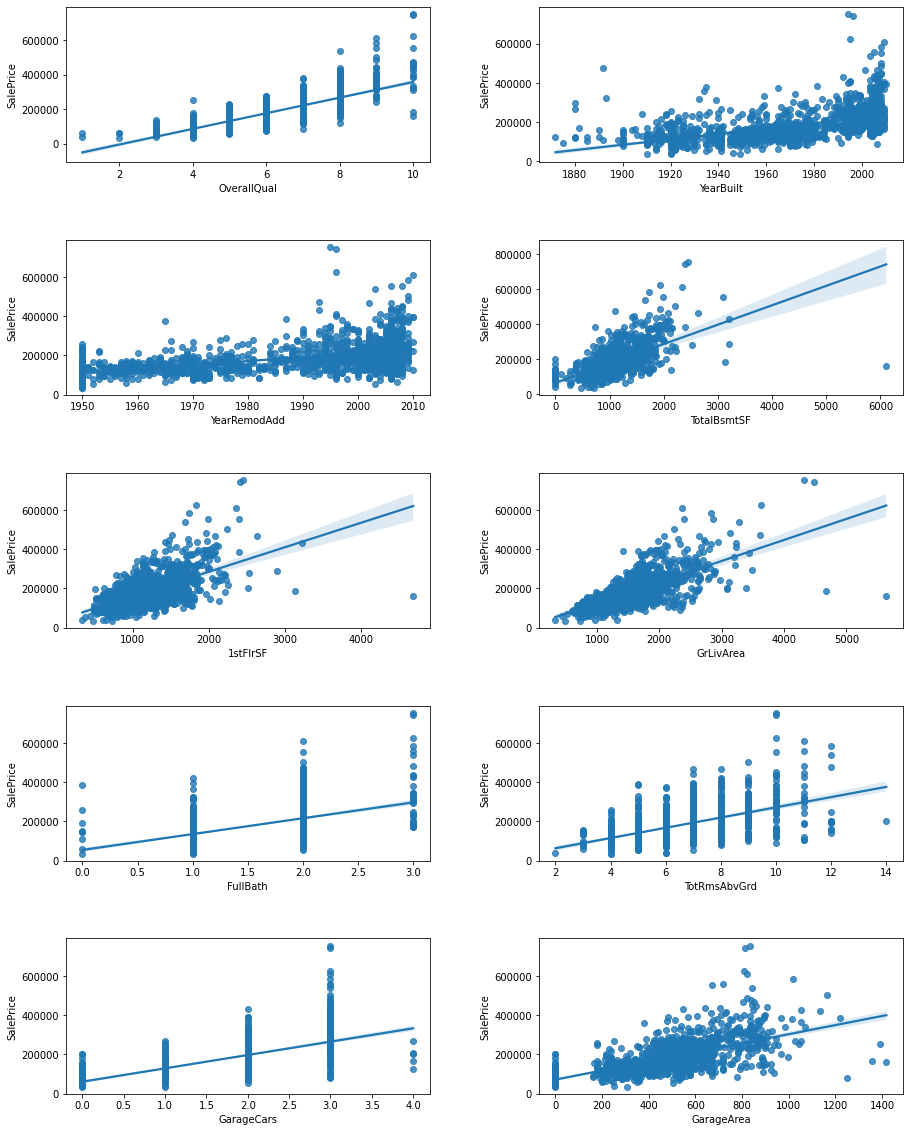

In [12]:
i = 1
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=.5 ,wspace = .3)
for var in selceted_num_df.columns:
    if var not in ['SalePrice']:
        plt.subplot(5,2,i)
        sns.regplot(data = selceted_num_df , x = selceted_num_df[var], y = selceted_num_df.SalePrice )
        i+=1

**visualize the selected numerical columns**

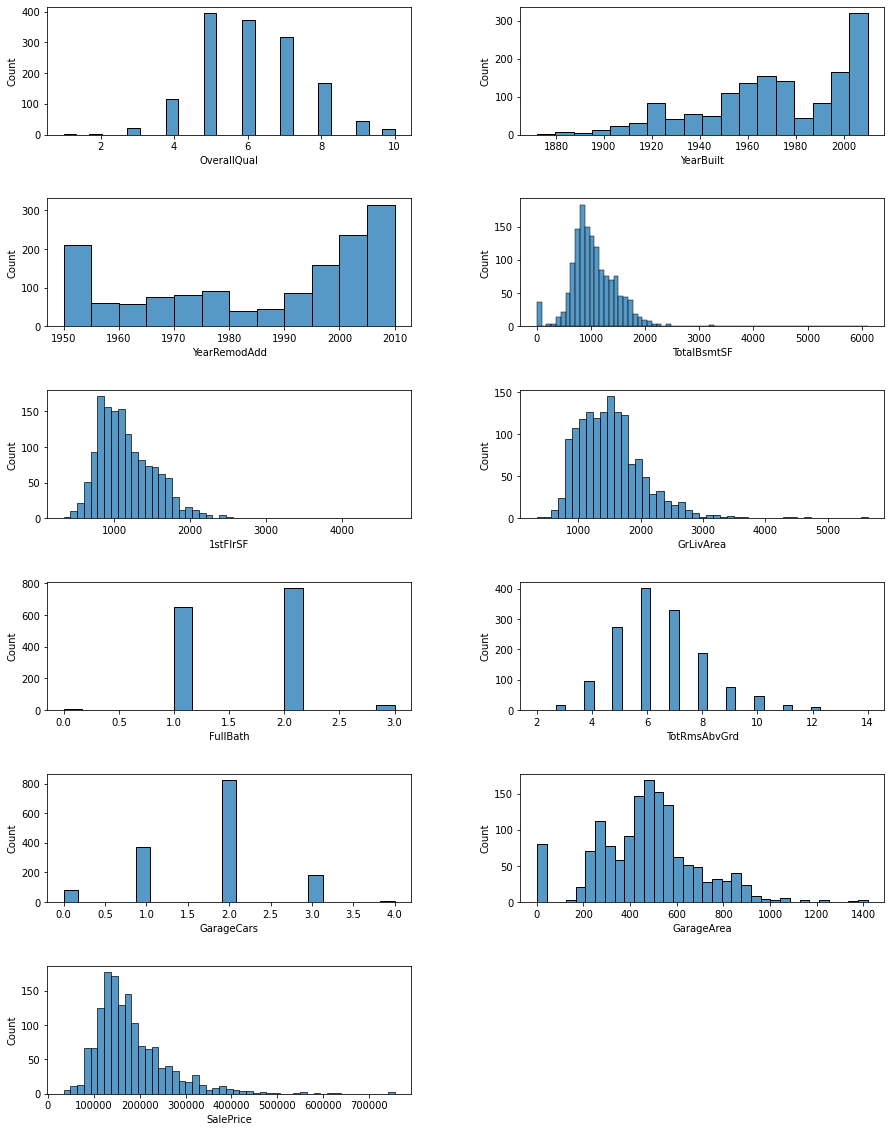

In [13]:
i = 1
plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=.5 ,wspace = .3)
for feature in selceted_num_col:
    plt.subplot(6,2,i)
    sns.histplot(train_df[feature], palette='Blues_r')
    i = i +1

**find out the missing values in selected numrical columns**

In [14]:
train_df[selceted_num_col].isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

**categorical columns**

In [15]:
train_df[all_cat_col].describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


**Deal with the Missing Values in all the data**

In [16]:
all_data.isna().sum().sort_values(ascending=False)[:40]

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
SalePrice        1459
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtExposure       82
BsmtCond           82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
BsmtHalfBath        2
BsmtFullBath        2
Utilities           2
BsmtFinSF1          1
BsmtFinSF2          1
SaleType            1
Electrical          1
GarageCars          1
TotalBsmtSF         1
GarageArea          1
Exterior2nd         1
Exterior1st         1
KitchenQual         1
BsmtUnfSF           1
Fireplaces          0
TotRmsAbvGrd        0
SaleCondition       0
OpenPorchSF         0
YrSold              0
dtype: int64

In [17]:
# From data_description.txt na values in PoolQC mean there is No pool
all_data.PoolQC.fillna("none",inplace=True)

# From data_description.txt na values in MiscFeature mean there is No Misc Feature
all_data.MiscFeature.fillna("none",inplace=True)

# From data_description.txt na values in Alley mean there is No Alley
all_data.Alley.fillna("none",inplace=True)

# From data_description.txt na values in Fence mean there is No Fence
all_data.Fence.fillna("none",inplace=True)

# From data_description.txt na values in FireplaceQu mean there is No Fireplace 
all_data.FireplaceQu.fillna("none",inplace=True)

# From data_description.txt na values in FireplaceQu mean there is No Fireplace 
all_data.FireplaceQu.fillna("none",inplace=True)

# Group by neighborhood and fill in missing value by the median LotFrontage
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# From data_description.txt na values in ( GarageCond ,GarageYrBlt ,GarageFinish ,GarageQual ,GarageType ,  ) mean there is No Garage
all_data.GarageCond.fillna("none",inplace=True)
all_data.GarageYrBlt.fillna(0,inplace=True)
all_data.GarageFinish.fillna("none",inplace=True)
all_data.GarageQual.fillna("none",inplace=True)
all_data.GarageType.fillna("none",inplace=True)


# From data_description.txt na values in ( BsmtExposure ,BsmtCond ,BsmtQual ,BsmtFinType1 ,BsmtFinType2) mean there is No Basement
all_data.BsmtExposure.fillna("none",inplace=True)
all_data.BsmtCond.fillna("none",inplace=True)
all_data.BsmtQual.fillna("none",inplace=True)
all_data.BsmtFinType1.fillna("none",inplace=True)
all_data.BsmtFinType2.fillna("none",inplace=True)

# From data_description.txt na values in ( MasVnrType ,MasVnrArea ) mean there is No Masonry veneer
all_data.MasVnrType.fillna("none",inplace=True)
all_data.MasVnrArea.fillna(0,inplace=True)

# From data_description.txt na values in Functional mean Typ
all_data['Functional'].fillna('Typ',inplace = True)

# na mean Zero
all_data['GarageCars'].fillna(0,inplace = True)
all_data['GarageArea'].fillna(0,inplace = True)

# fill the rest of the columns with the most common (there are only 2 or 1 missing values)
all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0],inplace = True)
all_data['BsmtFullBath'].fillna(all_data['BsmtFullBath'].mode()[0],inplace = True)
all_data['BsmtHalfBath'].fillna(all_data['BsmtHalfBath'].mode()[0],inplace = True)
all_data['Utilities'].fillna(all_data['Utilities'].mode()[0],inplace = True)
all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0],inplace = True)
all_data['BsmtFinSF2'].fillna(all_data['BsmtFinSF2'].mode()[0],inplace = True)
all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0],inplace = True)
all_data['BsmtUnfSF'].fillna(all_data['BsmtUnfSF'].mode()[0],inplace = True)
all_data['BsmtFinSF1'].fillna(all_data['BsmtFinSF1'].mode()[0],inplace = True)
all_data['TotalBsmtSF'].fillna(all_data['TotalBsmtSF'].mode()[0],inplace = True)
all_data['SaleType'].fillna(all_data['SaleType'].mode()[0],inplace = True)
all_data['Electrical'].fillna(all_data['Electrical'].mode()[0],inplace = True)
all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0],inplace = True)


In [18]:
# One-Hot Encoding
Cat_columns = all_data.select_dtypes(include = ['object']).columns
final_data = pd.get_dummies(all_data , columns = Cat_columns)

#now split the data clean data
clean_train_df = final_data.iloc[:train_df.shape[0]]
clean_test_df = final_data.iloc[train_df.shape[0]:]


In [19]:
#make sure that we get ride of all the missing data 
clean_train_df.isna().sum().sort_values(ascending=False)[:5] 

Id                   0
BsmtFinType1_ALQ     0
BsmtFinType2_ALQ     0
BsmtFinType1_none    0
BsmtFinType1_Unf     0
dtype: int64

**Prepare the Target Variable for the Regression** inspire by SERIGNE kernal (https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/notebook#Stacked-Regressions-to-predict-House-Prices)

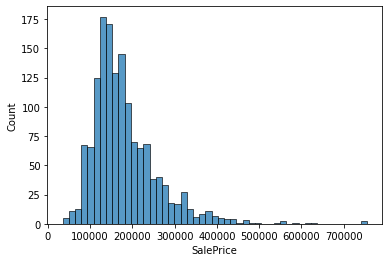

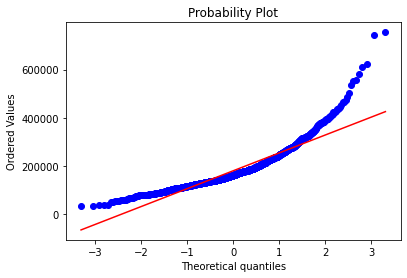

In [20]:
# distrubition of the Sales Price
sns.histplot( x= clean_train_df['SalePrice']);

#the QQ-plot
from scipy import stats
fig = plt.figure()
res = stats.probplot(clean_train_df['SalePrice'], plot=plt)
plt.show()

**Log-transformation of the target variable**

In [21]:
clean_train_df['SalePrice'] = np.log1p(clean_train_df['SalePrice'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


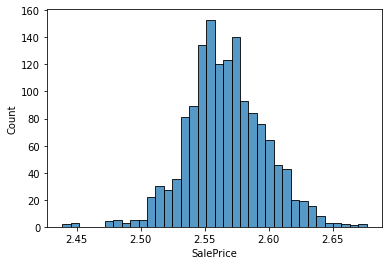

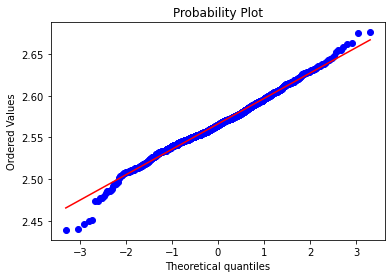

In [22]:
# distrubition of the Log Sales Price
sns.histplot( x= np.log1p(clean_train_df['SalePrice']));

#the QQ-plot
from scipy import stats
fig = plt.figure()
res = stats.probplot(np.log1p(clean_train_df['SalePrice']), plot=plt)
plt.show()

**Before modeling**

In [23]:
#split the x , y 
X = clean_train_df.drop("SalePrice", axis=1)
y = clean_train_df["SalePrice"]
print(f"the X shape is {X.shape} & the y shape is {y.shape}")



the X shape is (1460, 304) & the y shape is (1460,)


# Machine Learning Models
